# Major notes and ideas:

- make unecessery model diagnostics or computed values as on_demand variables instead, this improves efficiency (if they do not have to be calculated at every step)

- add index variable functionality! but how?

-

hm... now, where to start?

build "test" xso components, then go through backend and modify, whilst testing basic functionality

In [1]:
import xso

In [2]:
@xso.component
class Variable:
    var = xso.variable(description='basic state variable')
    
@xso.component
class Variable_with_dims:
    var = xso.variable(dims='var', description='basic state variable')
    
@xso.component
class Flux:
    """ basic flux process for testing 
    represents linear growth of a foreign variable
    """
    var = xso.variable(foreign=True, flux='growth', 
                       negative=False, description='variable affected by flux',
                      dims=[(),('var')])
    rate = xso.parameter(description='linear rate of change',
                      dims=[(),('var')])

    @xso.flux(dims=[(),('var')], description='hello')
    def growth(self, var, rate):
        """ """
        return var * rate

In [3]:
MODEL = xso.create({"Var":Variable, "VarDims":Variable_with_dims, "Flux":Flux, "Flux_dims":Flux})

In [4]:
MODEL

<xsimlab.Model (7 processes, 10 inputs)>
Core
    solver_type     [in]
Time
    time            [in] ('input_time',) sequence of time points fo...
Var
    var_label       [in] label / basic state variable
    var_init        [in] initial value / basic state variable
VarDims
    var_label       [in] label / basic state variable
    var_init        [in] ('var',) initial value / basic state variable
Flux
    var             [in] label reference / variable affected by flux
    rate            [in] () or ('var',) linear rate of change
Flux_dims
    var             [in] label reference / variable affected by flux
    rate            [in] () or ('var',) linear rate of change
Solver

In [5]:
import numpy as np

SETUP = xso.setup(solver='odeint', model=MODEL,
            time=np.arange(0,5),
            input_vars={'Var':{'var_label':'A', 'var_init':1.},
                        'VarDims':{'var_label':'B', 'var_init':[1.,2.]},
                        'Flux':{'var':'A', 'rate':1.},
                        'Flux_dims':{'var':'B', 'rate':[1.,0.5]},
                       }
         )

In [6]:
with MODEL:
    OUTPUT = SETUP.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Var
Initializing component VarDims
Initializing component Flux
Initializing component Flux_dims
assembling model
SOLVER : <xso.solvers.ODEINTSolver object at 0x1579fd7f0>
Model is assembled:
Model contains: 
Variables:['time', 'A', 'B'] 
Parameters:['Flux_rate', 'Flux_dims_rate'] 
Forcings:[] 
Fluxes:['Time_time_flux', 'Flux_growth', 'Flux_dims_growth'] 
Full Model Dimensions:[('time', None), ('A', None), ('B', 2), ('Time_time_flux', None), ('Flux_growth', None), ('Flux_dims_growth', 2)] 

finalizing: cleanup
Model was solved in 0.01632 seconds


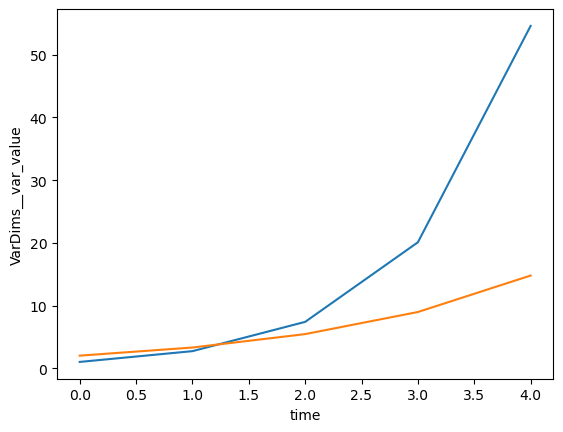

In [7]:
OUTPUT.VarDims__var_value[0].plot()
OUTPUT.VarDims__var_value[1].plot()